In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score,confusion_matrix

In [70]:
df = pd.read_excel("data_news.xlsx")
df

category                                           headline  \
0      WELLNESS              143 Miles in 35 Days: Lessons Learned   
1      WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2      WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3      WELLNESS                     Oh, What a Difference She Made   
4      WELLNESS                                   Green Superfoods   
...         ...                                                ...   
49995    SPORTS  This Baseball Team Learned There's A Wrong Way...   
49996    SPORTS  Some Young Spurs Fan Dabbed 38 Times In A Sing...   
49997    SPORTS  Rasheed Wallace Ejected From Knicks-Suns Game ...   
49998    SPORTS  Why Jake Plummer And Other NFL Players Are Pus...   
49999    SPORTS  Simone Biles Isn't The Next Anyone, She's 'The...   

                                                   links  \
0      https://www.huffingtonpost.com/entry/running-l...   
1      https://www.huffingtonpost.com/entry/talking-t...   
2      https://www.huffingtonpost.com/entry/crenezuma...   
3      https://www.huffingtonpost.com/entry/meaningfu...   
4      https://www.huffingtonpost.com/entry/green-sup...   
...                                                  ...   
49995  https://www.huffingtonpost.com/entry/san-jose-...   
49996  https://www.huffingtonpost.com/entry/dab-kid-s...   
49997  https://www.huffingtonpost.com/entry/rasheed-w...   
49998  https://www.huffingtonpost.comhttp://extras.de...   
49999  https://www.huffingtonpost.com/entry/the-first...   

                                       short_description  \
0      Resting is part of training. I've confirmed wh...   
1      Think of talking to yourself as a tool to coac...   
2      The clock is ticking for the United States to ...   
3      If you want to be busy, keep trying to be perf...   
4      First, the bad news: Soda bread, corned beef a...   
...                                                  ...   
49995  Many fans were pissed after seeing the minor l...   
49996             Never change, young man. Never change.   
49997  Wallace was hit with a first technical for a h...   
49998  They believe CBD could be an alternative to po...   
49999             The gymnast is in a league of her own.   

                                                keywords  
0                                        running-lessons  
1                              talking-to-yourself-crazy  
2                     crenezumab-alzheimers-disease-drug  
3                                        meaningful-life  
4                                       green-superfoods  
...                                                  ...  
49995            san-jose-giants-japanese-heritage-night  
49996                          dab-kid-san-antonio-spurs  
49997  rasheed-wallace-ejected-knicks-suns-ball-dont-lie  
49998                                                NaN  
49999                             the-first-simone-biles  

[50000 rows x 5 columns]

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  49994 non-null  object
 4   keywords           47294 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [74]:
df.drop(columns=["links"],inplace=True)

In [76]:
df["keywords"] = df["keywords"].fillna("")
df["short_description"] = df["short_description"].fillna("")

In [78]:
df['headline'] = df['headline'].astype(str)
df['short_description'] = df['short_description'].astype(str)
df['keywords'] = df['keywords'].astype(str)

In [80]:
df["text"] = df["headline"] + ' ' + df["short_description"]  + ' ' + df["keywords"]

In [82]:
df.drop(columns=["keywords","short_description","headline"],inplace=True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  50000 non-null  object
 1   text      50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [86]:
df

category                                               text
0      WELLNESS  143 Miles in 35 Days: Lessons Learned Resting ...
1      WELLNESS  Talking to Yourself: Crazy or Crazy Helpful? T...
2      WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...
3      WELLNESS  Oh, What a Difference She Made If you want to ...
4      WELLNESS  Green Superfoods First, the bad news: Soda bre...
...         ...                                                ...
49995    SPORTS  This Baseball Team Learned There's A Wrong Way...
49996    SPORTS  Some Young Spurs Fan Dabbed 38 Times In A Sing...
49997    SPORTS  Rasheed Wallace Ejected From Knicks-Suns Game ...
49998    SPORTS  Why Jake Plummer And Other NFL Players Are Pus...
49999    SPORTS  Simone Biles Isn't The Next Anyone, She's 'The...

[50000 rows x 2 columns]

In [92]:
#class distribution
category_counts = df["category"].value_counts()
print(category_counts)

category
WELLNESS          5000
POLITICS          5000
ENTERTAINMENT     5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          5000
SPORTS            5000
Name: count, dtype: int64


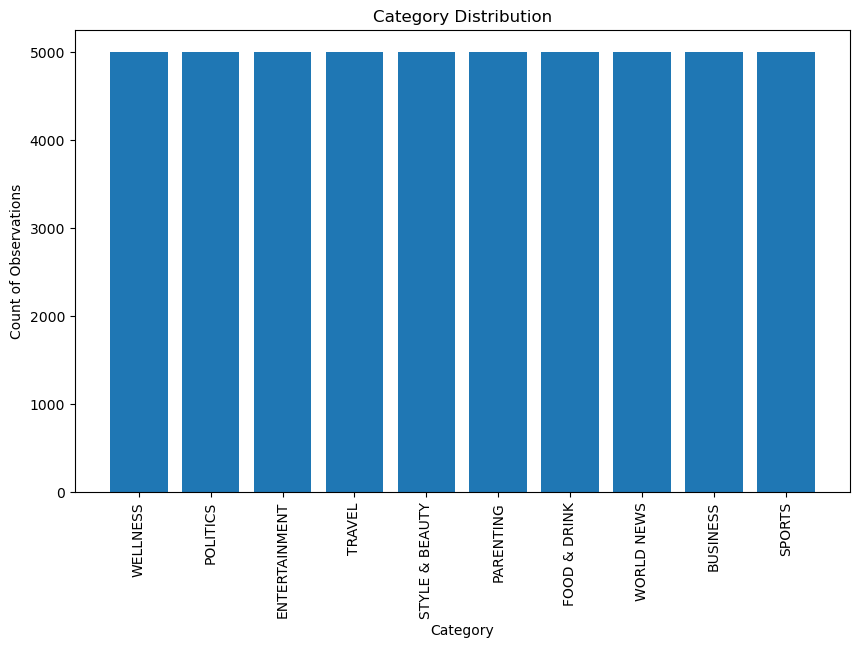

In [98]:
plt.figure(figsize=(10,6))
plt.bar(category_counts.index,category_counts.values)
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count of Observations")
plt.xticks(rotation=90)
plt.show()

In [88]:
from preprocess import preprocess_text

df["cleaned_text"] = df["text"].apply(preprocess_text)
df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vyshn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vyshn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vyshn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


category                                               text  \
0      WELLNESS  143 Miles in 35 Days: Lessons Learned Resting ...   
1      WELLNESS  Talking to Yourself: Crazy or Crazy Helpful? T...   
2      WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3      WELLNESS  Oh, What a Difference She Made If you want to ...   
4      WELLNESS  Green Superfoods First, the bad news: Soda bre...   
...         ...                                                ...   
49995    SPORTS  This Baseball Team Learned There's A Wrong Way...   
49996    SPORTS  Some Young Spurs Fan Dabbed 38 Times In A Sing...   
49997    SPORTS  Rasheed Wallace Ejected From Knicks-Suns Game ...   
49998    SPORTS  Why Jake Plummer And Other NFL Players Are Pus...   
49999    SPORTS  Simone Biles Isn't The Next Anyone, She's 'The...   

                                            cleaned_text  
0      mile day lesson learned resting part training ...  
1      talking crazy crazy helpful think talking tool...  
2      crenezumab trial gauge whether alzheimers drug...  
3      oh difference made want busy keep trying perfe...  
4      green superfoods first bad news soda bread cor...  
...                                                  ...  
49995  baseball team learned there wrong way celebrat...  
49996  young spur fan dabbed time single playoff game...  
49997  rasheed wallace ejected knickssuns game yellin...  
49998  jake plummer nfl player pushing research canna...  
49999  simone bile isnt next anyone shes first simone...  

[50000 rows x 3 columns]

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      50000 non-null  object
 1   text          50000 non-null  object
 2   cleaned_text  50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


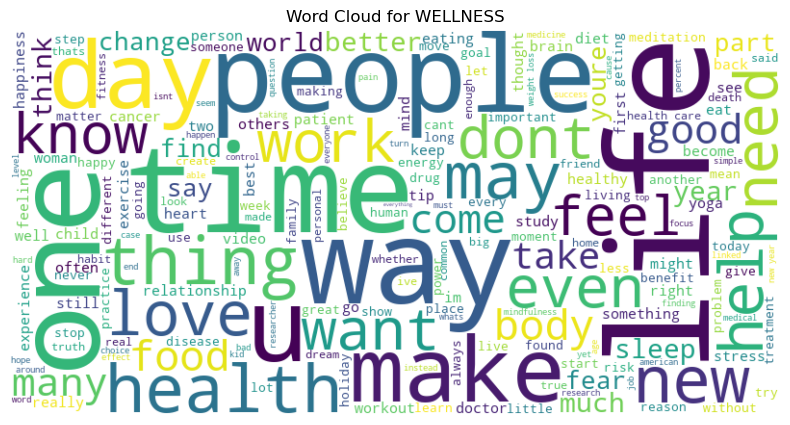

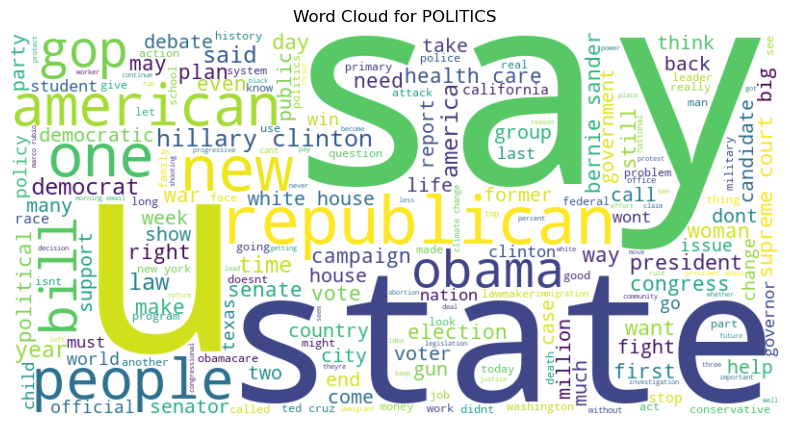

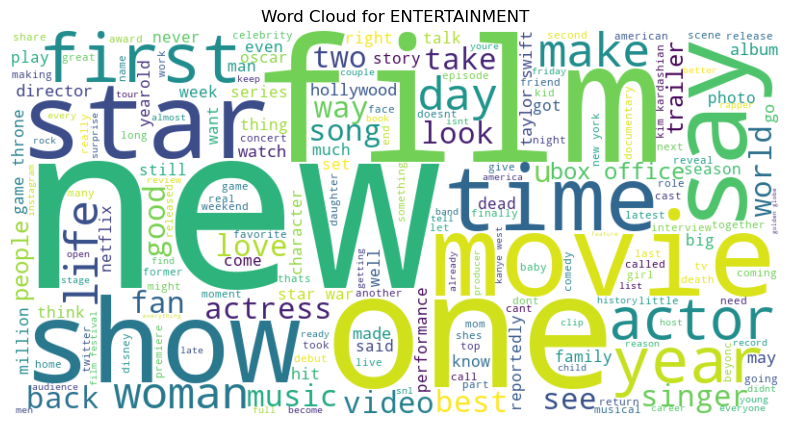

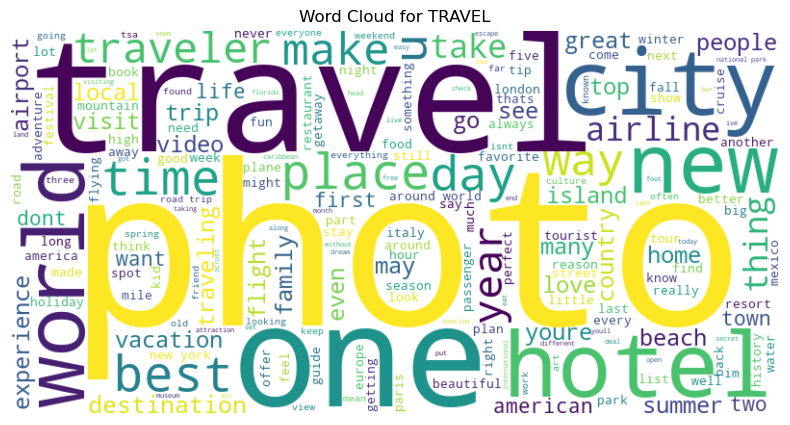

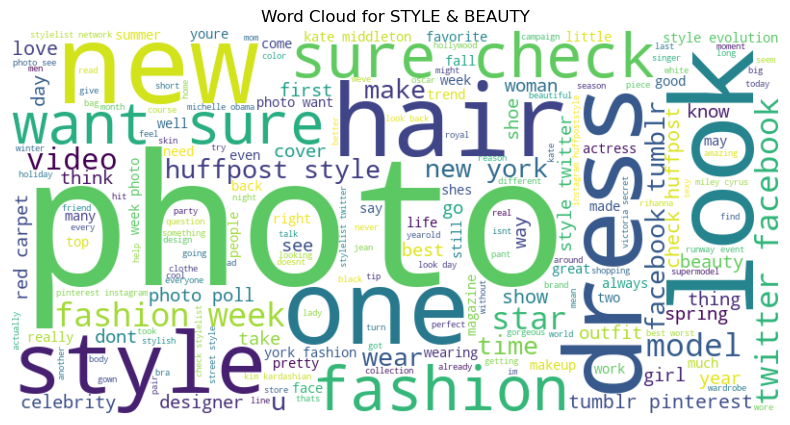

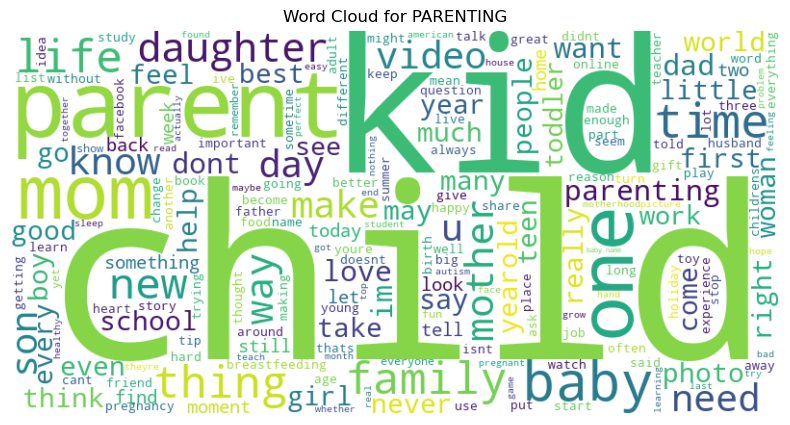

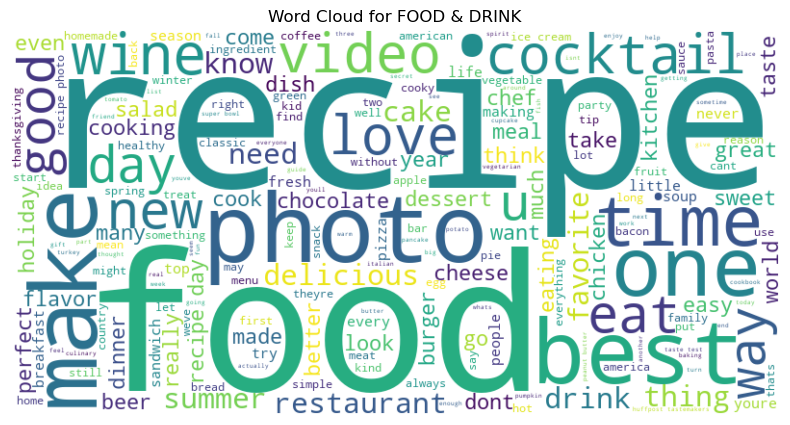

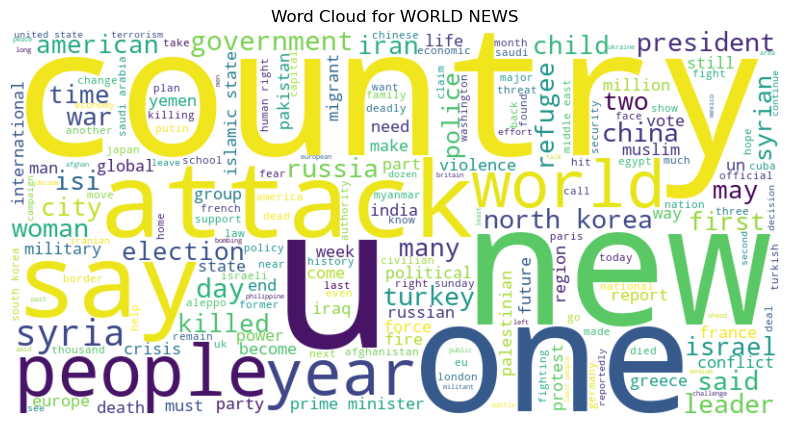

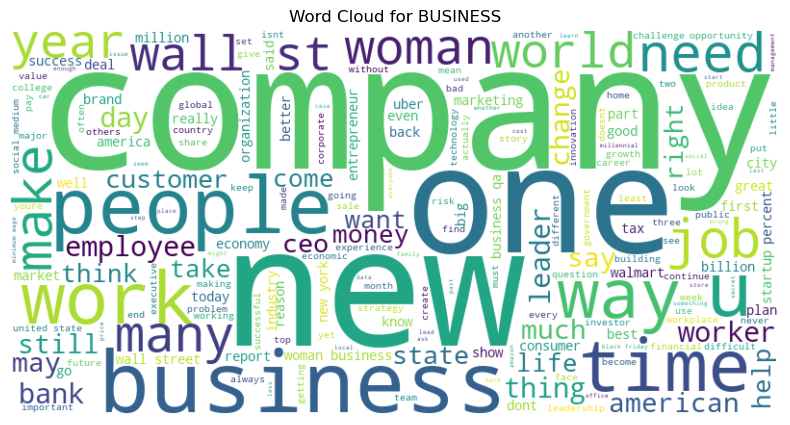

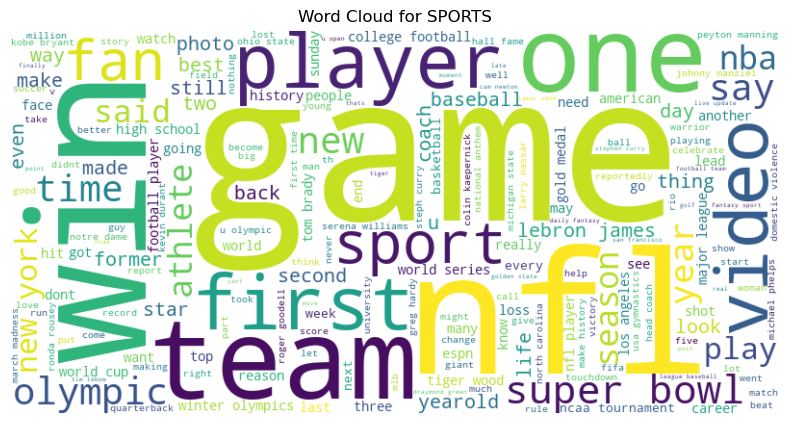

In [106]:
#wordcloud
from wordcloud import WordCloud

# Generate word cloud for each category
for category in df['category'].unique():
    text = ' '.join(df[df['category'] == category]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category}')
    plt.show()

In [112]:

X = df["cleaned_text"]
y = df["category"]
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape,y_train.shape)
print("Testing set size:", X_test.shape,y_test.shape)

Training set size: (40000,) (40000,)
Testing set size: (10000,) (10000,)


### Logistic Regression

In [126]:
pipeline_lr = make_pipeline(
    TfidfVectorizer(),
    LogisticRegression()
)

model_lr = pipeline_lr.fit(X_train,y_train)
model_lr

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [131]:
y_pred_lr = model_lr.predict(X_test)
print("Logistic Regression Accuray",accuracy_score(y_test,y_pred_lr))
print("\nClassification Report:\n",classification_report(y_test,y_pred_lr))

Logistic Regression Accuray 0.8171

Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.76      0.80      0.78       955
 ENTERTAINMENT       0.79      0.79      0.79       985
  FOOD & DRINK       0.87      0.85      0.86      1021
     PARENTING       0.78      0.78      0.78      1030
      POLITICS       0.82      0.76      0.79      1034
        SPORTS       0.90      0.91      0.91       995
STYLE & BEAUTY       0.87      0.86      0.86       986
        TRAVEL       0.84      0.82      0.83      1008
      WELLNESS       0.75      0.77      0.76      1009
    WORLD NEWS       0.81      0.82      0.81       977

      accuracy                           0.82     10000
     macro avg       0.82      0.82      0.82     10000
  weighted avg       0.82      0.82      0.82     10000



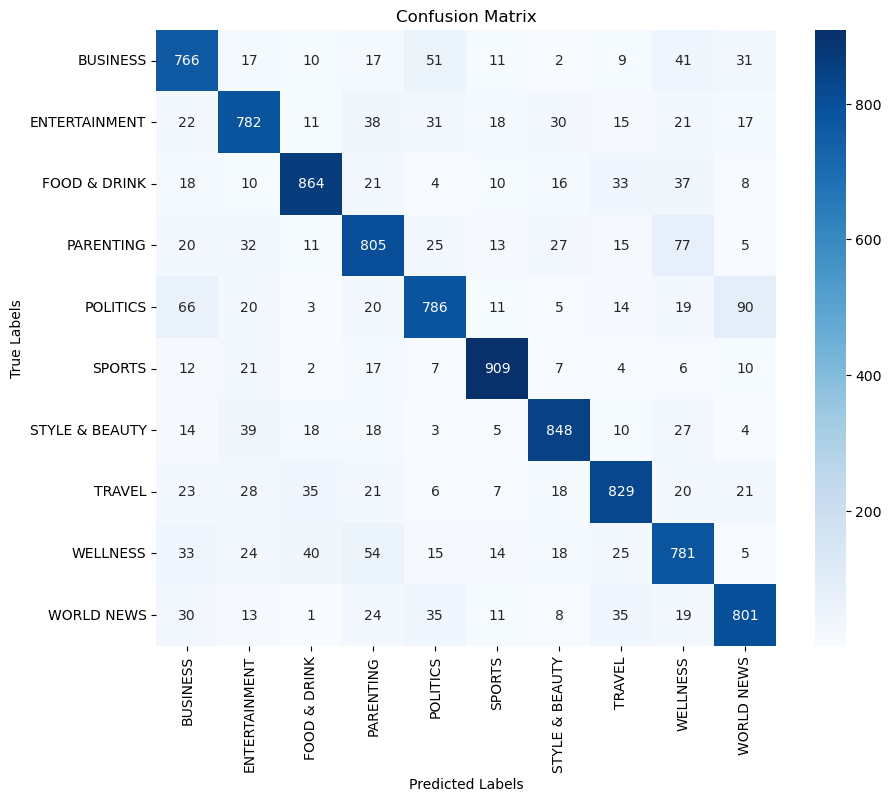

In [137]:
# Compute the confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model_lr.classes_, 
            yticklabels=model_lr.classes_)

# Add labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Naive Bayes

In [144]:
from sklearn.naive_bayes import MultinomialNB

pipeline_nb = make_pipeline(
    TfidfVectorizer(),
    MultinomialNB()
)
model_nb = pipeline_nb.fit(X_train, y_train)
model_nb

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [146]:
y_pred_nb = model_nb.predict(X_test)

print("Logistic Regression Accuray",accuracy_score(y_test,y_pred_nb))
print("\nClassification Report:\n",classification_report(y_test,y_pred_nb))

Logistic Regression Accuray 0.807

Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.72      0.79      0.75       955
 ENTERTAINMENT       0.89      0.72      0.80       985
  FOOD & DRINK       0.88      0.82      0.85      1021
     PARENTING       0.68      0.80      0.74      1030
      POLITICS       0.82      0.75      0.78      1034
        SPORTS       0.91      0.91      0.91       995
STYLE & BEAUTY       0.86      0.87      0.86       986
        TRAVEL       0.81      0.82      0.81      1008
      WELLNESS       0.73      0.78      0.75      1009
    WORLD NEWS       0.83      0.82      0.82       977

      accuracy                           0.81     10000
     macro avg       0.81      0.81      0.81     10000
  weighted avg       0.81      0.81      0.81     10000



## Support Vector Machine

In [156]:
from sklearn.svm import LinearSVC

pipeline_svm = make_pipeline(
    TfidfVectorizer(),
    LinearSVC()
)
model_svm = pipeline_svm.fit(X_train, y_train)
model_svm

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('linearsvc', LinearSVC())])

In [151]:
y_pred_svm = model_svm.predict(X_test)

print("Logistic Regression Accuray",accuracy_score(y_test,y_pred_svm))
print("\nClassification Report:\n",classification_report(y_test,y_pred_svm))

Logistic Regression Accuray 0.8298

Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.79      0.86      0.82       955
 ENTERTAINMENT       0.83      0.80      0.82       985
  FOOD & DRINK       0.87      0.85      0.86      1021
     PARENTING       0.79      0.80      0.80      1030
      POLITICS       0.84      0.75      0.79      1034
        SPORTS       0.91      0.95      0.93       995
STYLE & BEAUTY       0.87      0.89      0.88       986
        TRAVEL       0.84      0.82      0.83      1008
      WELLNESS       0.75      0.76      0.75      1009
    WORLD NEWS       0.82      0.83      0.82       977

      accuracy                           0.83     10000
     macro avg       0.83      0.83      0.83     10000
  weighted avg       0.83      0.83      0.83     10000



### Hyperparameter tuning

In [172]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "linearsvc__C" : [0.1 ,1 ,10],
    "linearsvc__loss": ['hinge', 'squared_hinge']
}

grid_search = GridSearchCV(
    estimator = model_svm,
    param_grid = param_grid,
    cv =5,
    scoring = 'accuracy',
    n_jobs = -1,
    verbose = 1
)

In [174]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('linearsvc', LinearSVC())]),
             n_jobs=-1,
             param_grid={'linearsvc__C': [0.1, 1, 10],
                         'linearsvc__loss': ['hinge', 'squared_hinge']},
             scoring='accuracy', verbose=1)

In [178]:
# Best parameters and score
print("Best Parameters (SVM):", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters (SVM): {'linearsvc__C': 1, 'linearsvc__loss': 'squared_hinge'}
Best Cross-Validation Accuracy: 0.8214750000000001


In [184]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

Accuracy: 0.8298

Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.79      0.86      0.82       955
 ENTERTAINMENT       0.83      0.80      0.82       985
  FOOD & DRINK       0.87      0.85      0.86      1021
     PARENTING       0.79      0.80      0.80      1030
      POLITICS       0.84      0.75      0.79      1034
        SPORTS       0.91      0.95      0.93       995
STYLE & BEAUTY       0.87      0.89      0.88       986
        TRAVEL       0.84      0.82      0.83      1008
      WELLNESS       0.75      0.76      0.75      1009
    WORLD NEWS       0.82      0.83      0.82       977

      accuracy                           0.83     10000
     macro avg       0.83      0.83      0.83     10000
  weighted avg       0.83      0.83      0.83     10000



### Save the best model

In [191]:
import joblib
joblib.dump(best_model,"linearsvc.pkl")

['linearsvc.pkl']

In [222]:
best_model

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('linearsvc', LinearSVC(C=1))])

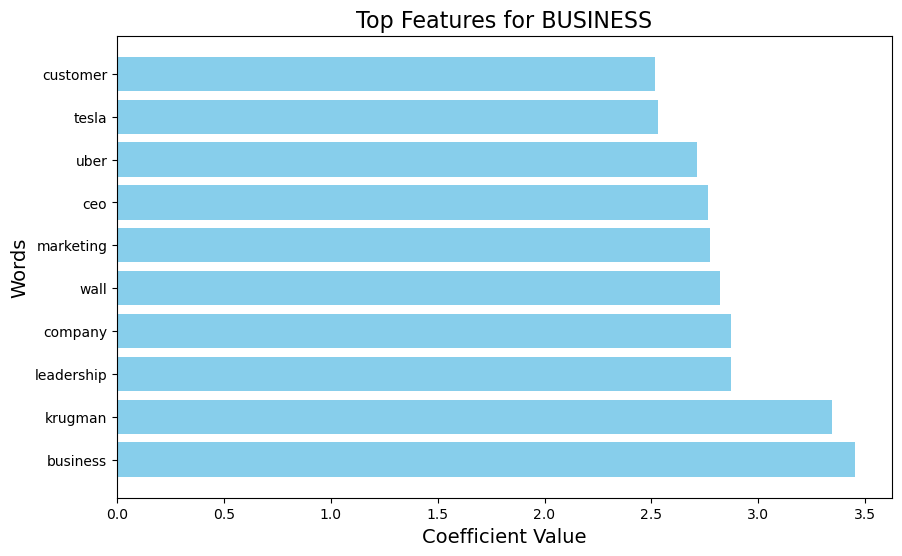

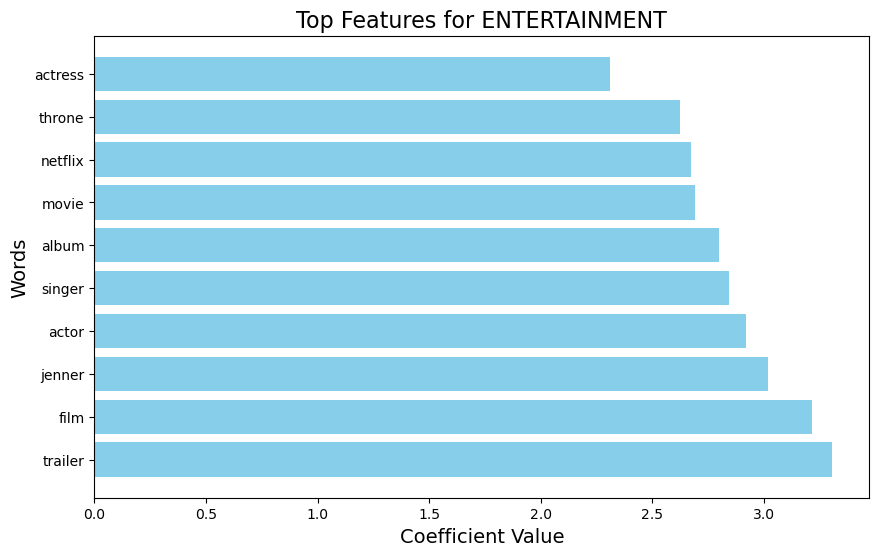

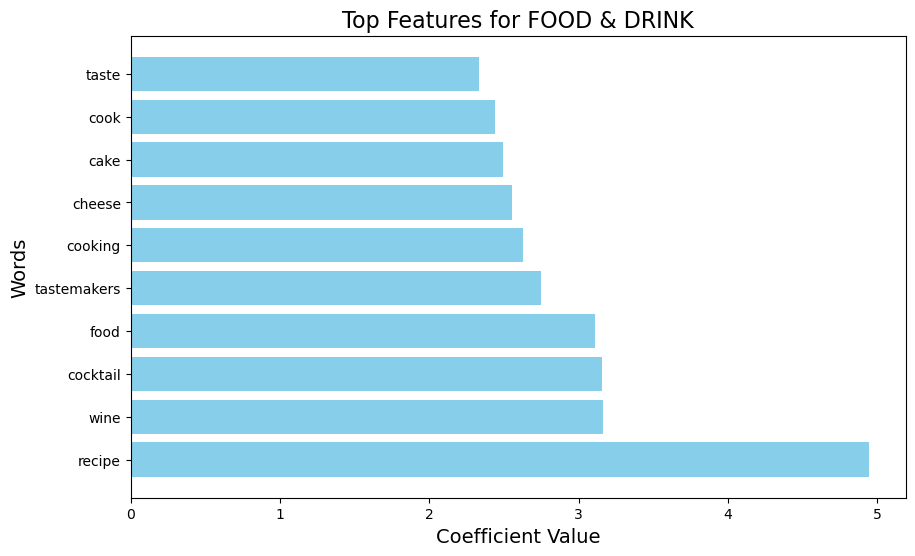

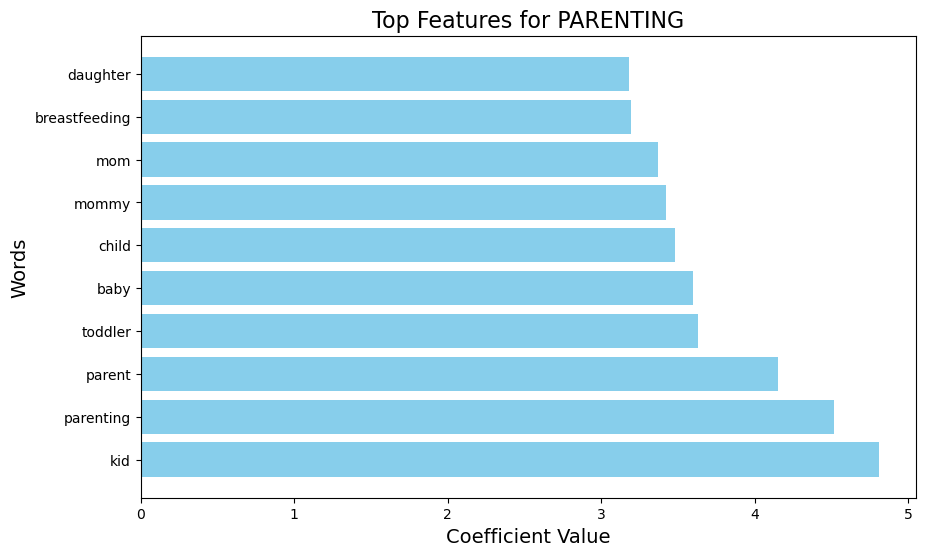

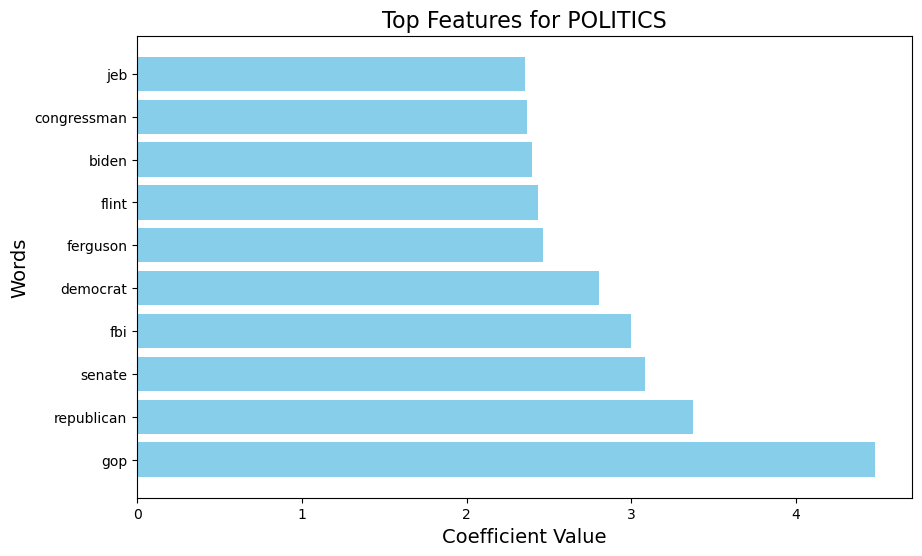

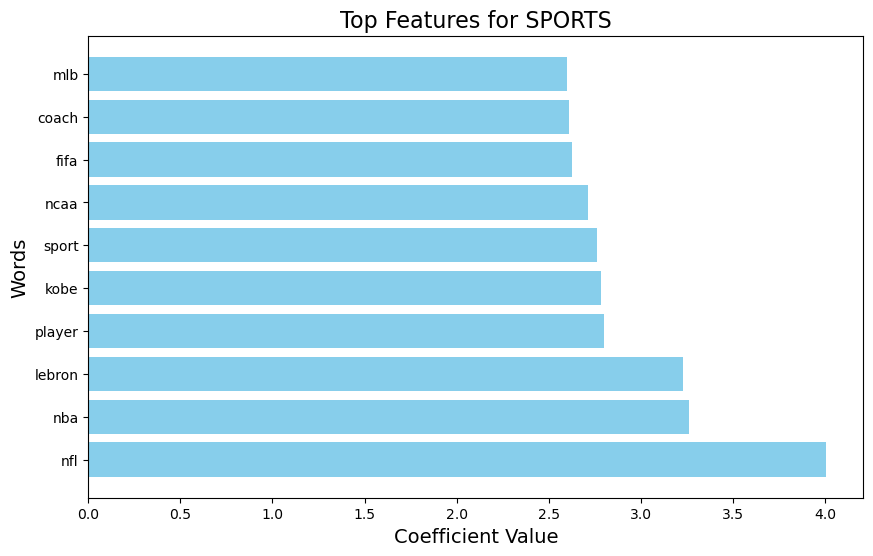

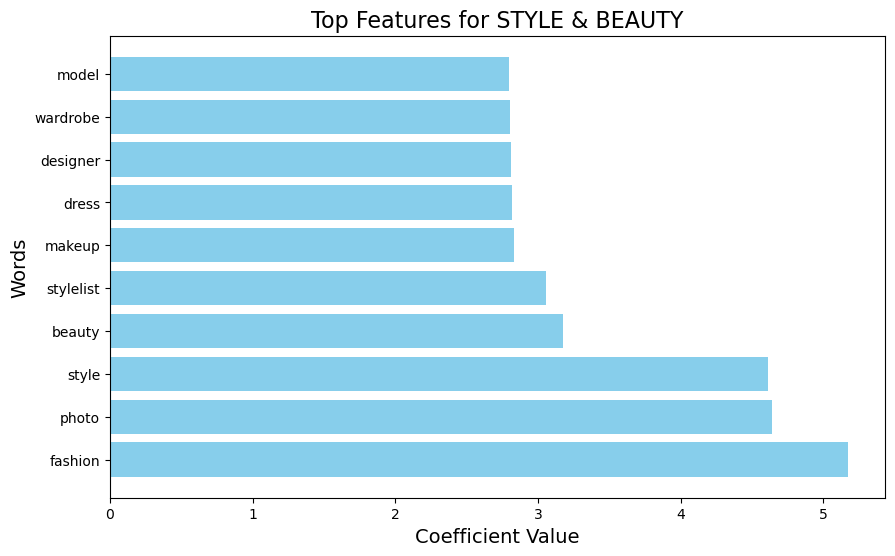

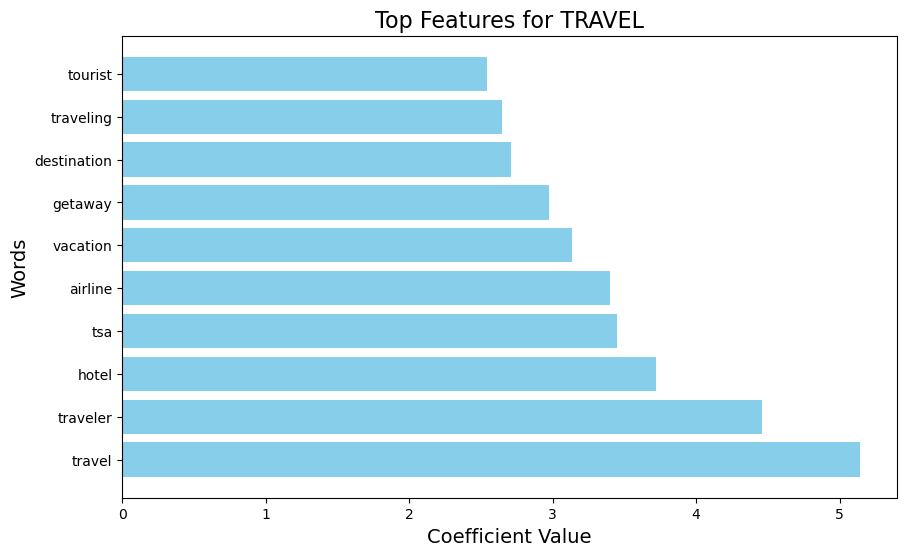

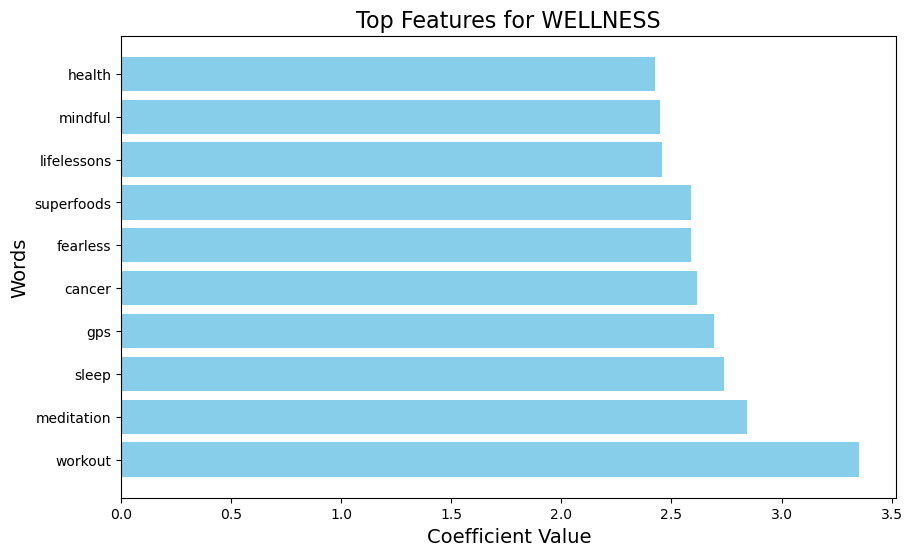

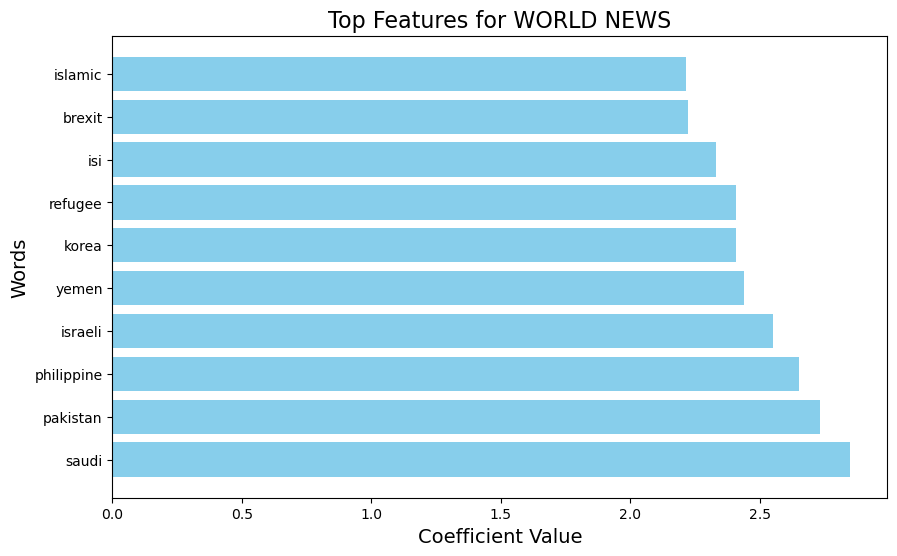

In [224]:
vectorizer = best_model.named_steps['tfidfvectorizer']
classifier = best_model.named_steps['linearsvc']

feature_names = vectorizer.get_feature_names_out()
coefficients = classifier.coef_
class_labels = classifier.classes_

# Function to get top N words for each class
def get_top_features_per_class(coefficients, feature_names, top_n=10):
    top_features = {}
    for i, class_label in enumerate(class_labels):
        top_indices = np.argsort(coefficients[i])[-top_n:]  # Top positive features
        top_features[class_label] = [(feature_names[j], coefficients[i][j]) for j in top_indices]
    return top_features

# Get top features
top_features = get_top_features_per_class(coefficients, feature_names, top_n=10)


# Plot top features for each class
for class_label, features in top_features.items():
    words, scores = zip(*features)
    plt.figure(figsize=(10, 6))
    plt.barh(words, scores, color='skyblue')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.title(f'Top Features for {class_label}', fontsize=16)
    plt.xlabel('Coefficient Value', fontsize=14)
    plt.ylabel('Words', fontsize=14)
    plt.show()

### Prediction on new data

In [239]:
laoded_model = joblib.load("linearsvc.pkl")

new_data1 = [
    "Government introduces new economic stimulus package.",
    "Indian cricket team secures historic Test series win.",
    "NASA plans manned mission to Mars by 2030.",
    "Bollywood actress announces retirement from film industry.",
    "Sensex hits all-time high amid positive market sentiment.",
    "New COVID variant detected in several countries.",
    "ISRO launches 36 satellites in a single mission.",
    "Prime Minister addresses nation on Independence Day.",
    "Meta unveils new AI-powered social media platform.",
    "Cyclone warning issued for coastal Andhra Pradesh.",
    "Supreme Court rules on privacy data protection law.",
    "Electric vehicle startup partners with major automaker.",
    "Health ministry launches mental wellness initiative.",
    "Olympic athlete wins gold medal for India in wrestling.",
    "Central government rolls out 5G across major cities.",
    "New web series on digital scams goes viral online.",
    "RBI keeps repo rate unchanged for third consecutive quarter.",
    "Scientists develop biodegradable alternative to plastic.",
    "State elections to be held in five key regions next month.",
    "Major cybersecurity breach exposes millions of user records."
]
loaded_model.predict(new_data1)

array(['BUSINESS', 'SPORTS', 'WORLD NEWS', 'ENTERTAINMENT', 'BUSINESS',
       'WELLNESS', 'ENTERTAINMENT', 'WORLD NEWS', 'WORLD NEWS', 'SPORTS',
       'POLITICS', 'BUSINESS', 'WELLNESS', 'SPORTS', 'WORLD NEWS',
       'PARENTING', 'BUSINESS', 'PARENTING', 'WORLD NEWS', 'BUSINESS'],
      dtype=object)

In [241]:
sample_article = [""""
    India’s retail credit squeeze threatens central bank’s consumption revival hopesPublished: July 29, 2025
    India’s central bank is facing challenges in its effort to boost economic growth through rate cuts and increased liquidity.
    Banks have tightened retail lending due to rising non‑performing loans and strained household finances. 
    Despite the Reserve Bank of India’s policy easing, growth in unsecured retail credit (personal loans, credit cards, vehicle finance) fell sharply to single-digit levels in May 2025, down from much higher rates a year earlier.
    Major lenders — including HDFC Bank, ICICI Bank, Axis Bank, Kotak Mahindra Bank, and Bajaj Finance — reported a surge in bad loans during the April–June quarter. 
    Credit card delinquencies over 90 days have nearly doubled year‑on‑year to ₹338 billion (≈ $3.9 billion). As a result, banks are raising credit-score thresholds, reducing exposure to existing riskier borrowers, and focusing more on secured lending.
    Analysts warn that these cautious lending measures may undermine the RBI’s consumption-driven growth strategy.
    The central bank’s financial stability report highlights elevated household debt and rising risk among lower-rated borrowers. 
    Experts estimate it could take four to six quarters for household debt repayment capacity to return to sustainable levels, posing a serious threat to India’s broader economic revival plans.
    """]

predicted_cat = loaded_model.predict(sample_article)
print(predicted_cat[0])

BUSINESS


#### The model is performing well on real word data